In [1]:
# Due to huge number of records,for loop might take 2-3 minutes

In [2]:
#                                         Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# For seaborn visualization
%matplotlib inline

In [4]:
# Assume athelete_events = df
df=pd.read_csv(r'C:\Users\hp\Desktop\athlete_events.csv')

<AxesSubplot:>

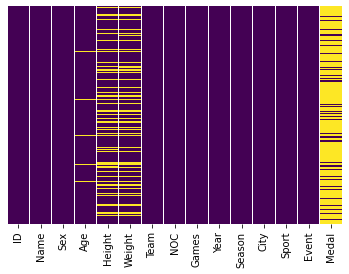

In [5]:
#Heatmap showing off the missing values in each column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [7]:
#Converting Medal Column to a appropriate value
df['Medal'].fillna('No Medal',inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

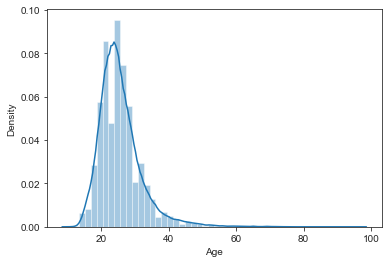

In [66]:
# Showing skeweness of distribution
sns.distplot(df['Age'])

In [12]:
# Chaining mode off
pd.options.mode.chained_assignment = None  # default='warn'

In [13]:
# Filling missing values in Age column using "Multivariate Imputation(Event)"
gb=round(df.groupby(['Event']).mean()['Age'])
for i in range(len(df['Age'])):
    if df['Age'].isnull().iloc[i]:
        event_loc=df['Event'].iloc[i]
        check_Null=gb[event_loc]
        if check_Null!=check_Null:
#             Since distribution is skewed
            df['Age'].iloc[i]=round(df['Age'].median()) 
        else:
            df['Age'].iloc[i]=gb[event_loc]

<Figure size 7200x3600 with 0 Axes>

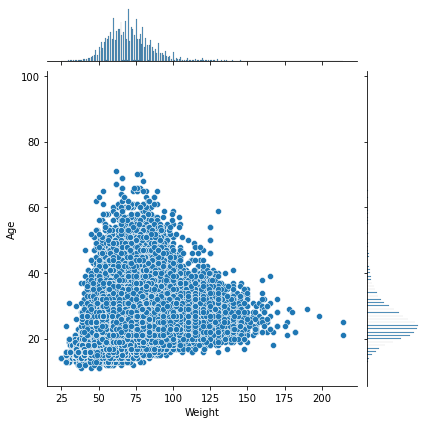

In [14]:
# Correlation between Age and Weight Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Weight',y='Age',data=df)

In [15]:
# Filling missing values in Weight column using "Multivariate Imputation(Event,Age)"
gb=df.groupby(['Event','Age']).mean()['Weight']
for i in range(len(df['Weight'])):
    if df['Weight'].isnull().iloc[i]:
        event_loc=df['Event'].iloc[i]
        age_loc=df['Age'].iloc[i]
        check_Null=gb[event_loc][age_loc]
        if check_Null!=check_Null:
            df['Weight'].iloc[i]=df['Weight'].mean()
        else:    
            df['Weight'].iloc[i]=gb[event_loc][age_loc]

<Figure size 7200x3600 with 0 Axes>

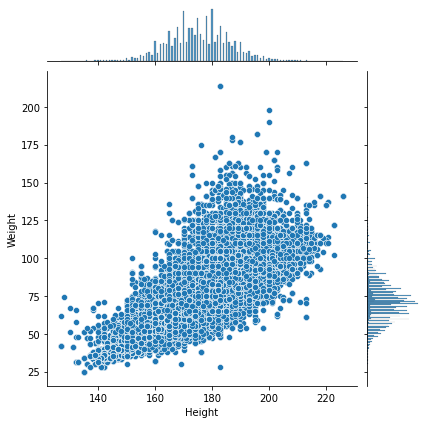

In [16]:
# Correlation between Weight and Height Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Height',y='Weight',data=df)

<Figure size 7200x3600 with 0 Axes>

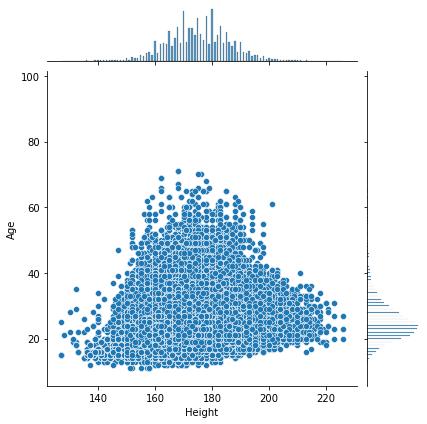

In [17]:
# Correlation between Age and Height Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Height',y='Age',data=df)

In [18]:
# Filling missing values in Height column using "Multivariate Imputation(Weight,Age)"
gb=df.groupby(['Weight','Age']).mean()['Height']
for i in range(len(df['Height'])):
    if df['Height'].isnull().iloc[i]:
        x=df['Weight'].iloc[i]
        y=df['Age'].iloc[i]
        check_Null=gb[x][y]
        if check_Null!=check_Null:
            df['Height'].iloc[i]=df['Height'].mean()
        else:    
            df['Height'].iloc[i]=gb[x][y]

<AxesSubplot:>

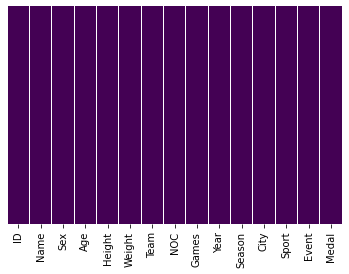

In [19]:
#Heatmap showing off the missing values in each column
# plt.figure(figsize=(10,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
# Data is done cleaning
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

# Ages with most Medals


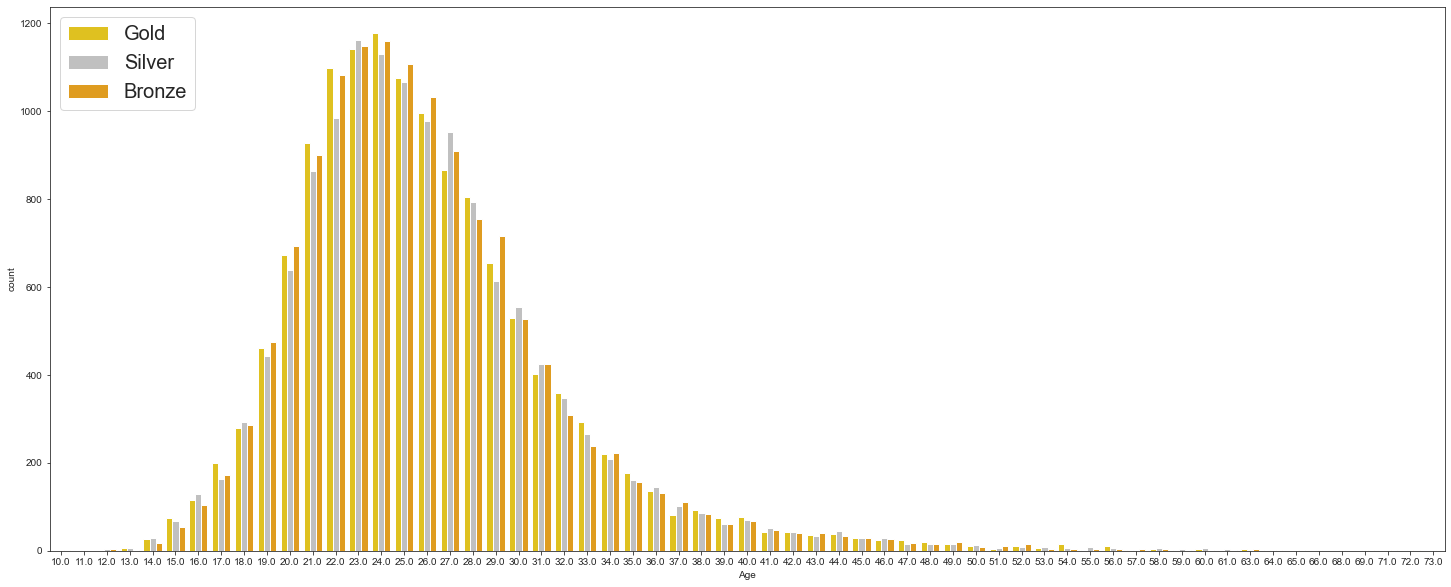

In [102]:
sns.set_style('ticks')
df_NoMedal=df[(df['Medal']=='Gold') | (df['Medal']=='Silver') | (df['Medal']=='Bronze') ]
plt.figure(figsize=(25,10))
palette = ['gold', 'silver', 'orange']
sns.countplot(x="Age",hue='Medal',data=df_NoMedal,hue_order=['Gold','Silver','Bronze'], palette = palette)
plt.legend(loc='upper left',fontsize=20)

# Average age   entries of Males vs Females 

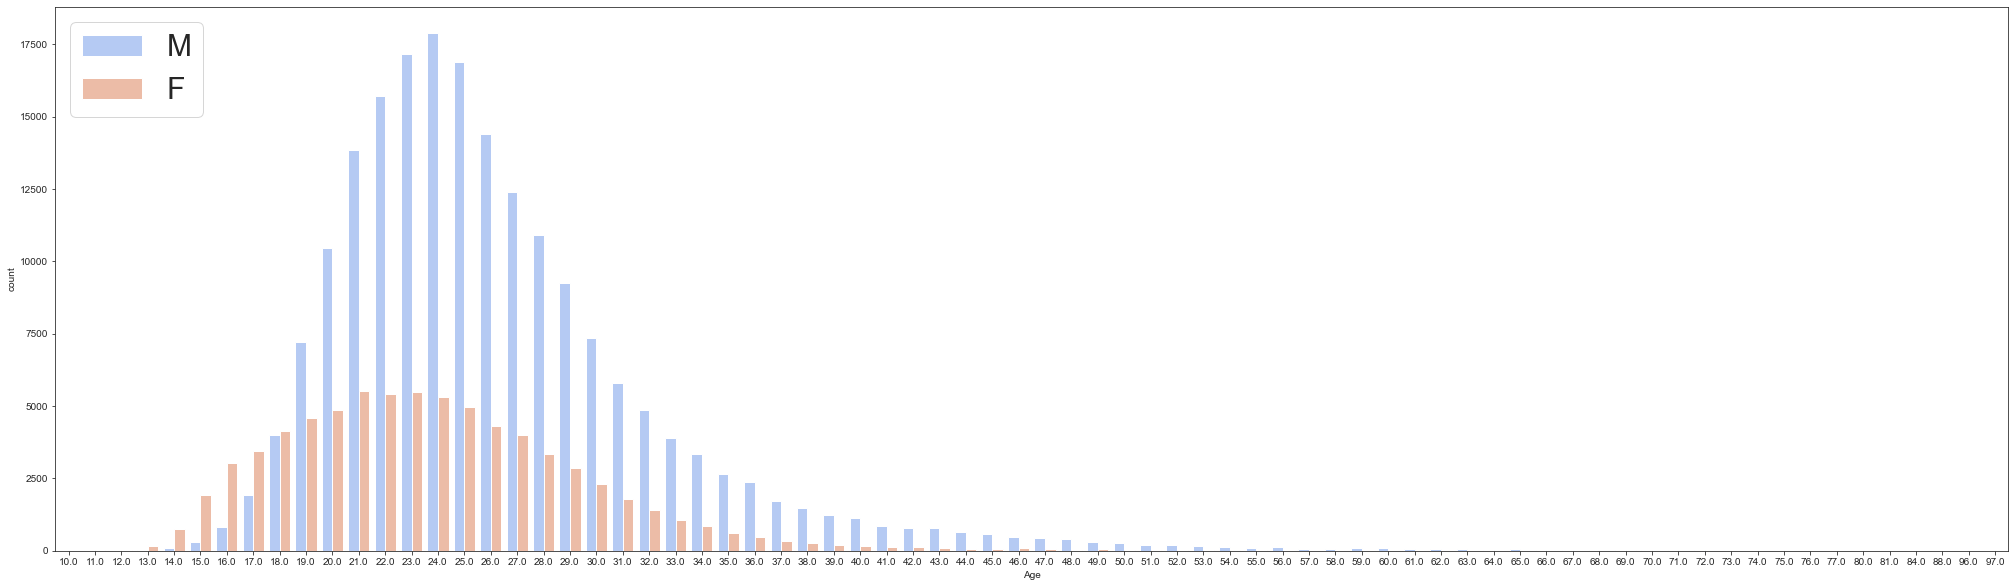

In [100]:
sns.set_style('ticks')
plt.figure(figsize=(35,10))
sns.countplot(x='Age',hue='Sex',data=df, palette="coolwarm")
plt.legend(loc='upper left',fontsize=30)

# Each Sport presence in both Seasons

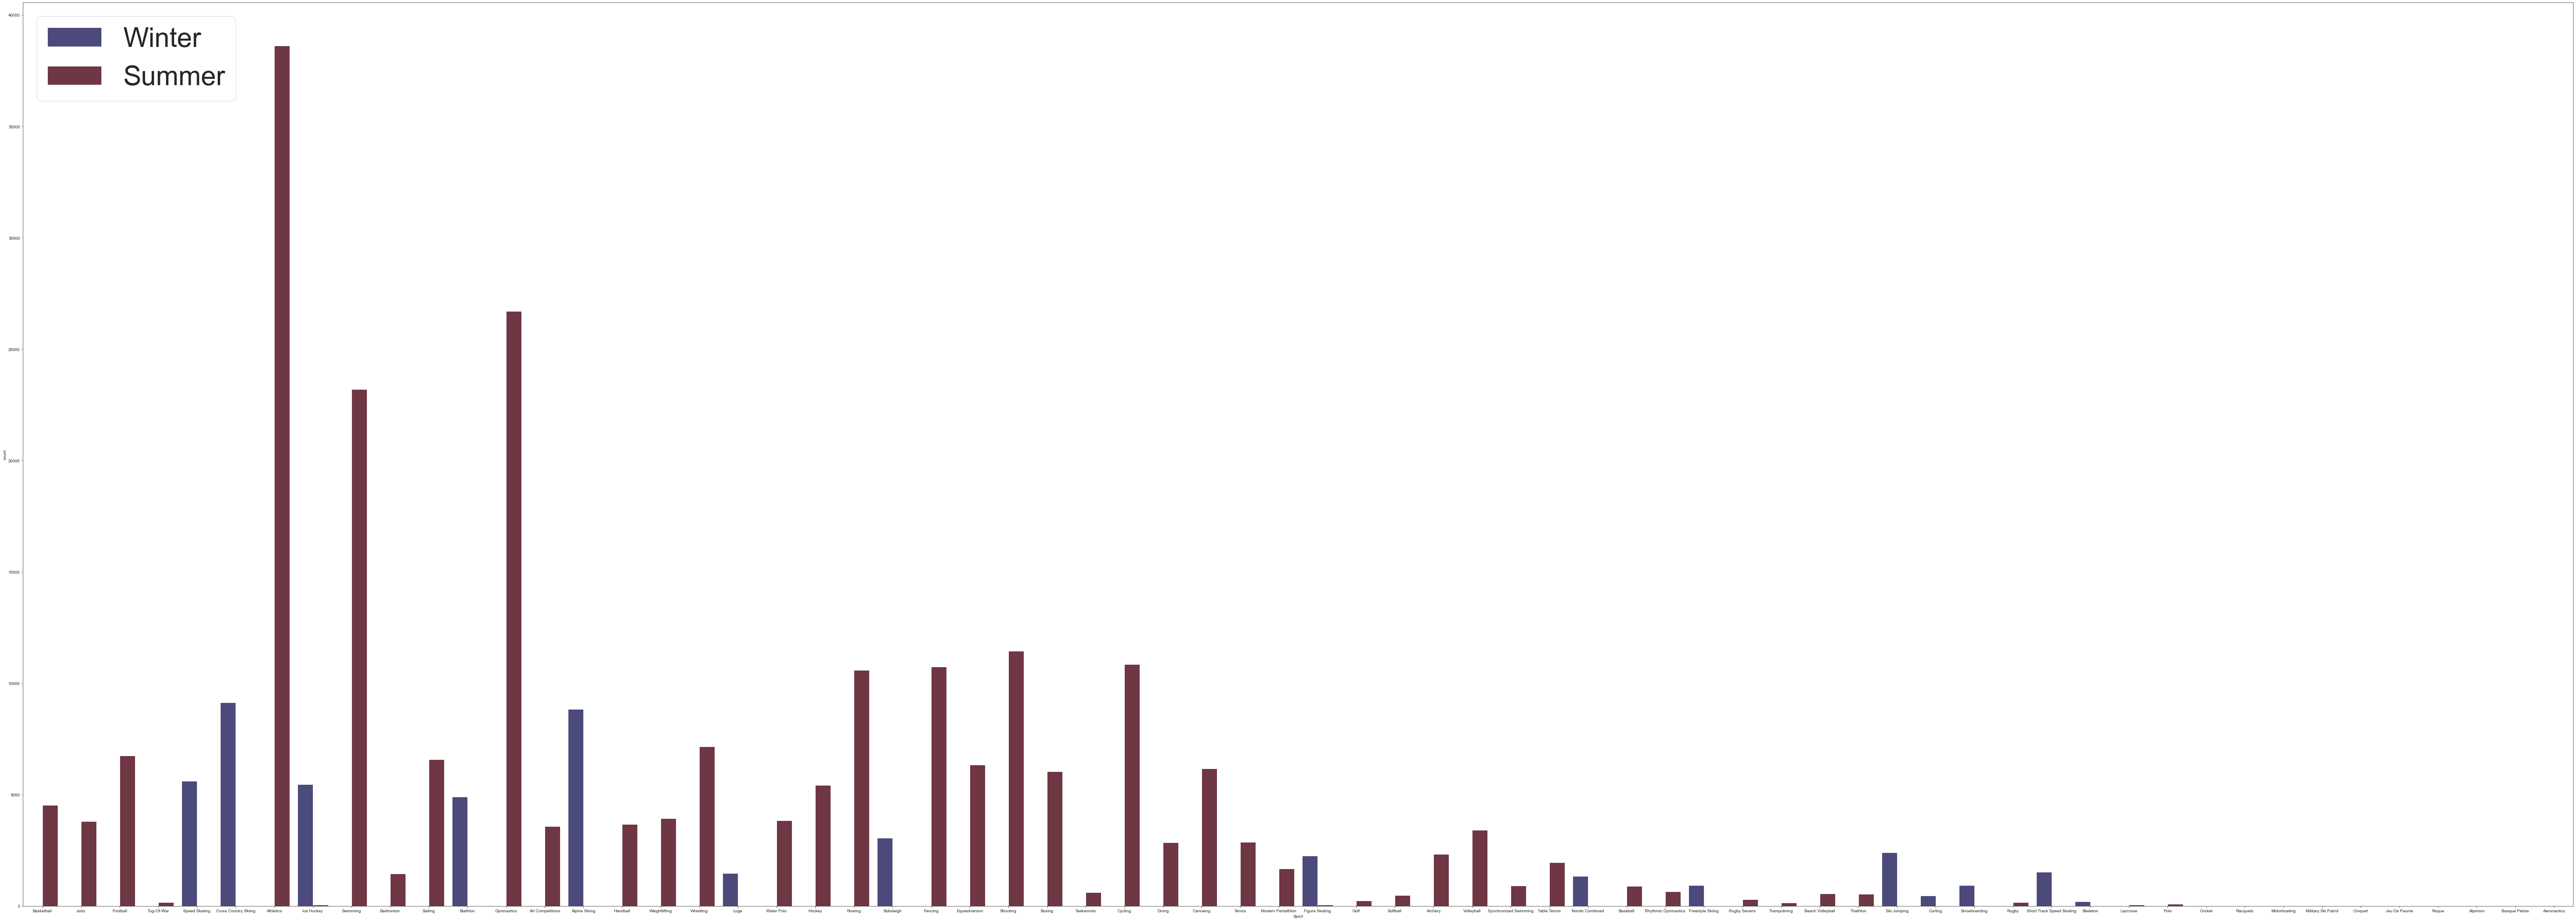

In [107]:
plt.figure(figsize=(110,40))
sns.countplot(x ='Sport',hue='Season',data = df,palette='icefire',hue_order=['Winter','Summer'])
plt.legend(loc='upper left',fontsize=65)